In [285]:
source("R/docker_linseed_pipeline/simulation.R")

In [183]:
source("R/docker_linseed_pipeline/SinkhornNNLSLinseedC.R")

In [184]:
Rcpp::sourceCpp("R/docker_linseed_pipeline/pipeline.cpp")

In [185]:
source("R/linseed_2_utils.R")

In [234]:
options(repr.plot.width=15, repr.plot.height=6)

# Add marker samples

In [197]:
sim <- createSimulation(12000, 100, 3, with_marker_genes = F)
sim <- addBasisSamples(sim)

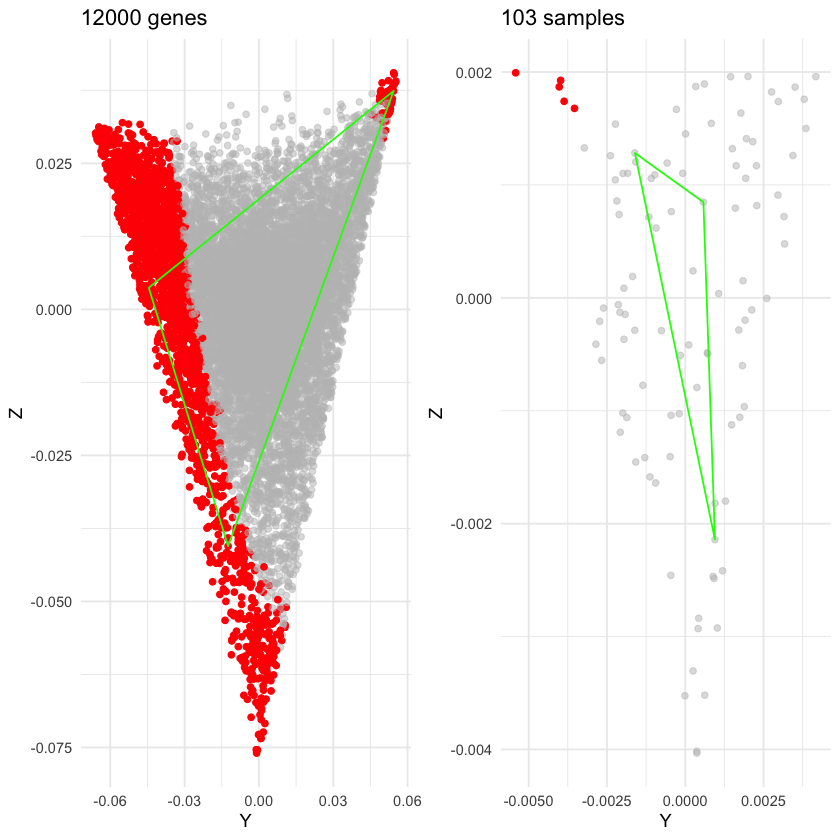

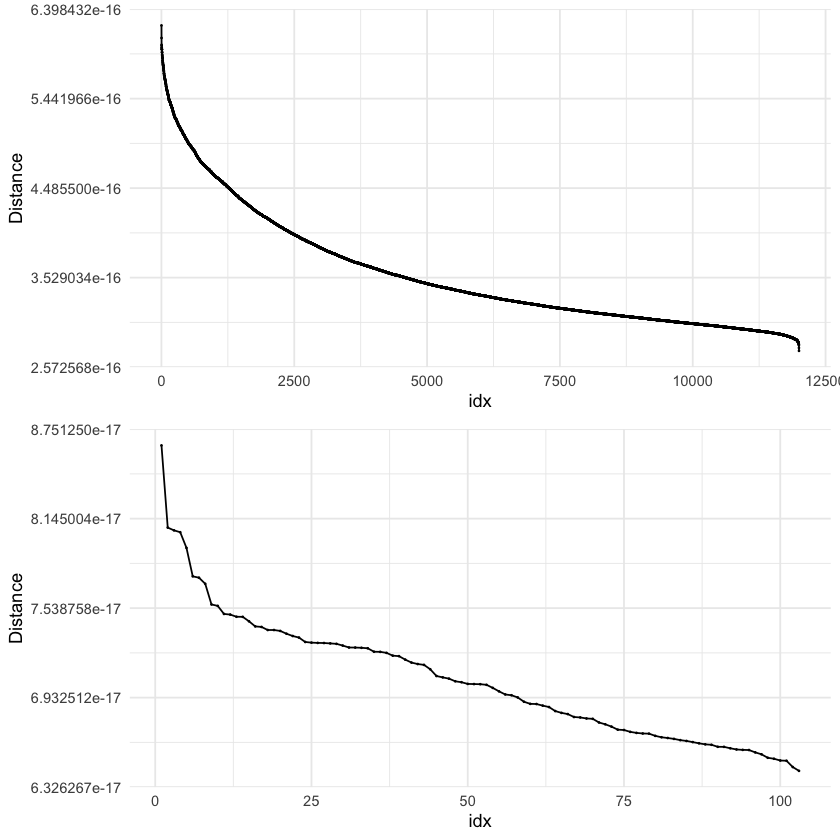

In [198]:
lo2 <- init_lo2(sim$data, 12000)

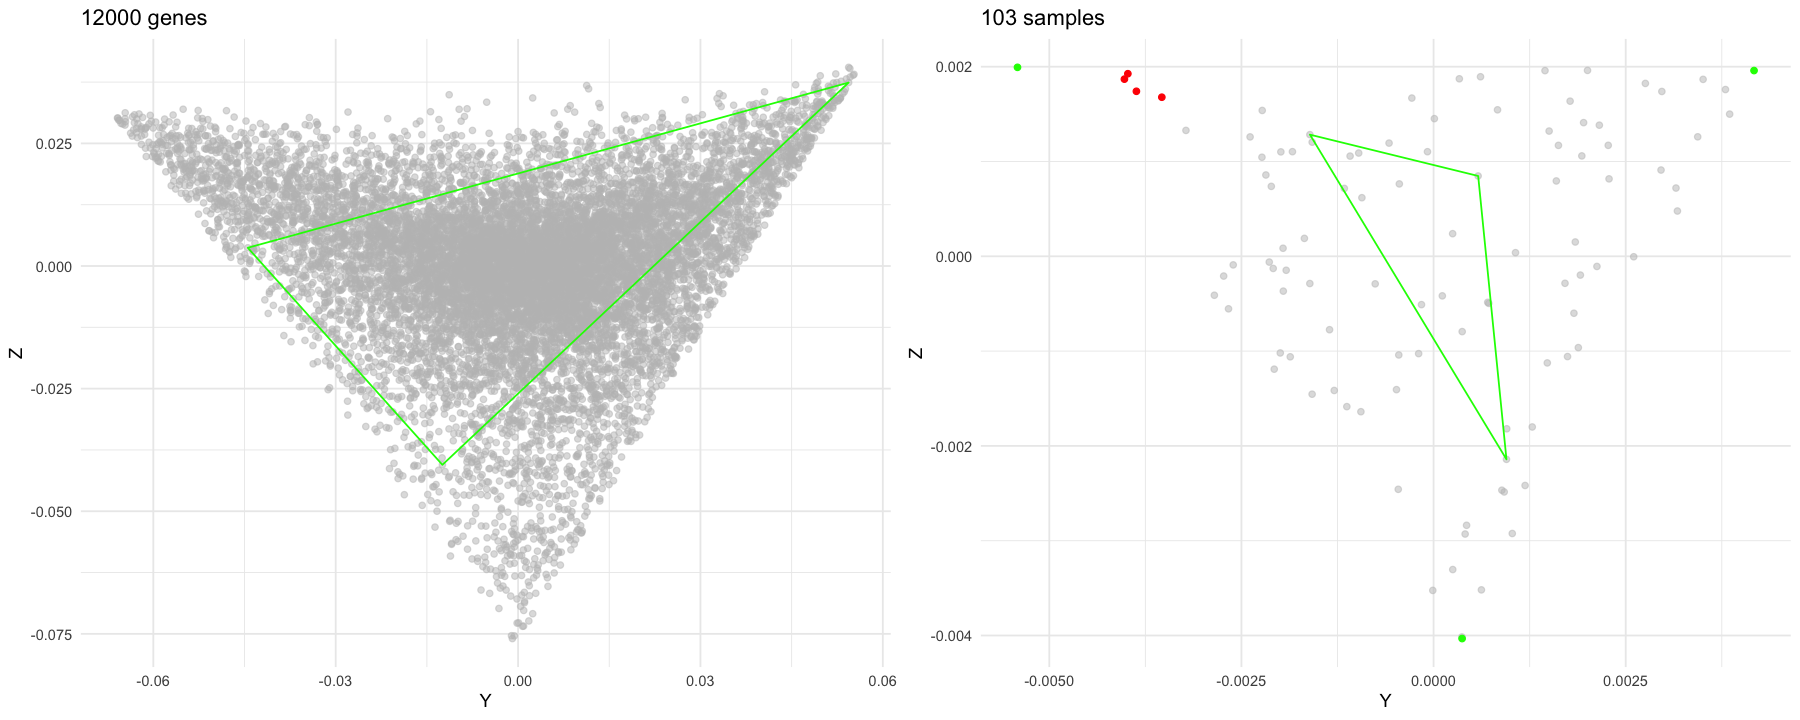

In [239]:
plotPointsColored(
    mid_alpha = 0.5,
    lo2,
    genes_borders = c(1, 12000),
    highlight_samples = sim$basis_sample_names,
    highlight_genes = sim$marker_gene_names
)

## With noise

In [205]:
sim_3 <- addNoise(sim, noise_deviation = 3, protect_samples = sim$basis_sample_names)

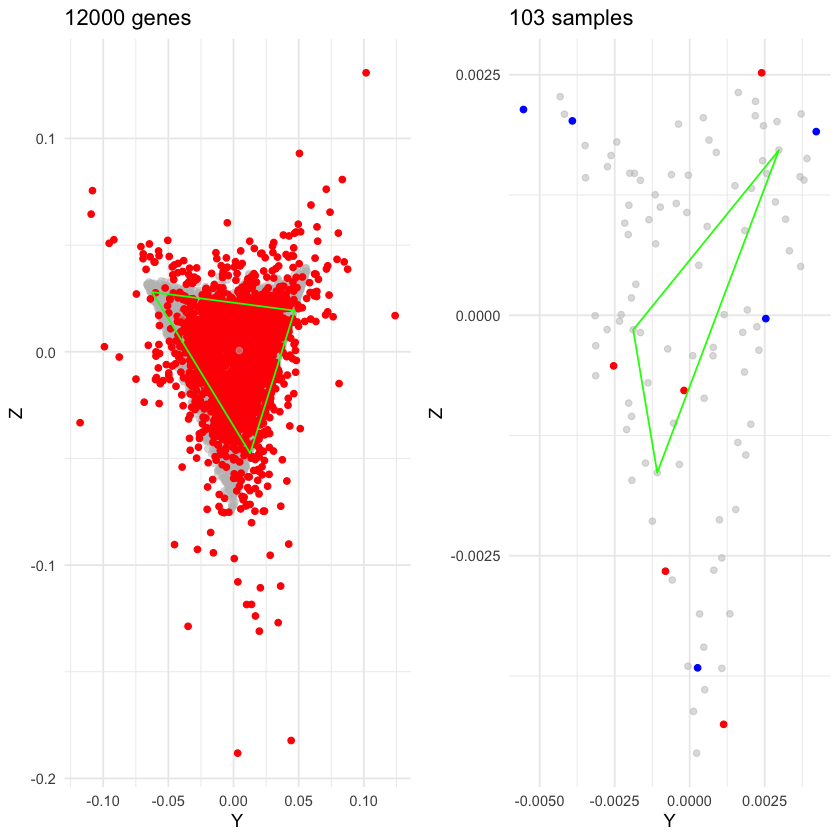

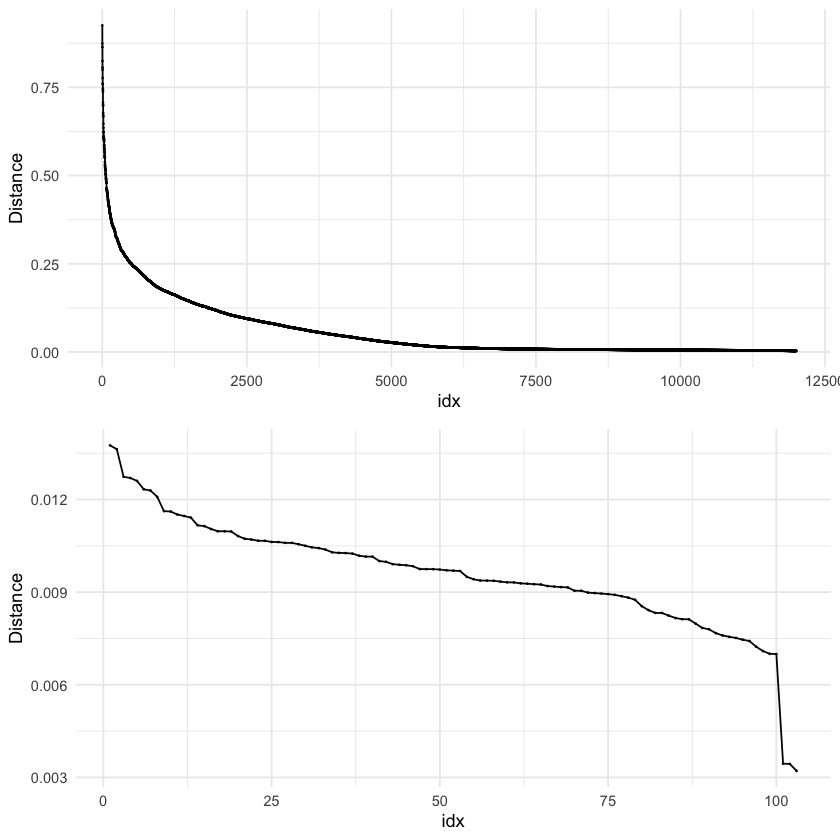

In [206]:
lo2_3 <- init_lo2(sim_3$data, 12000)

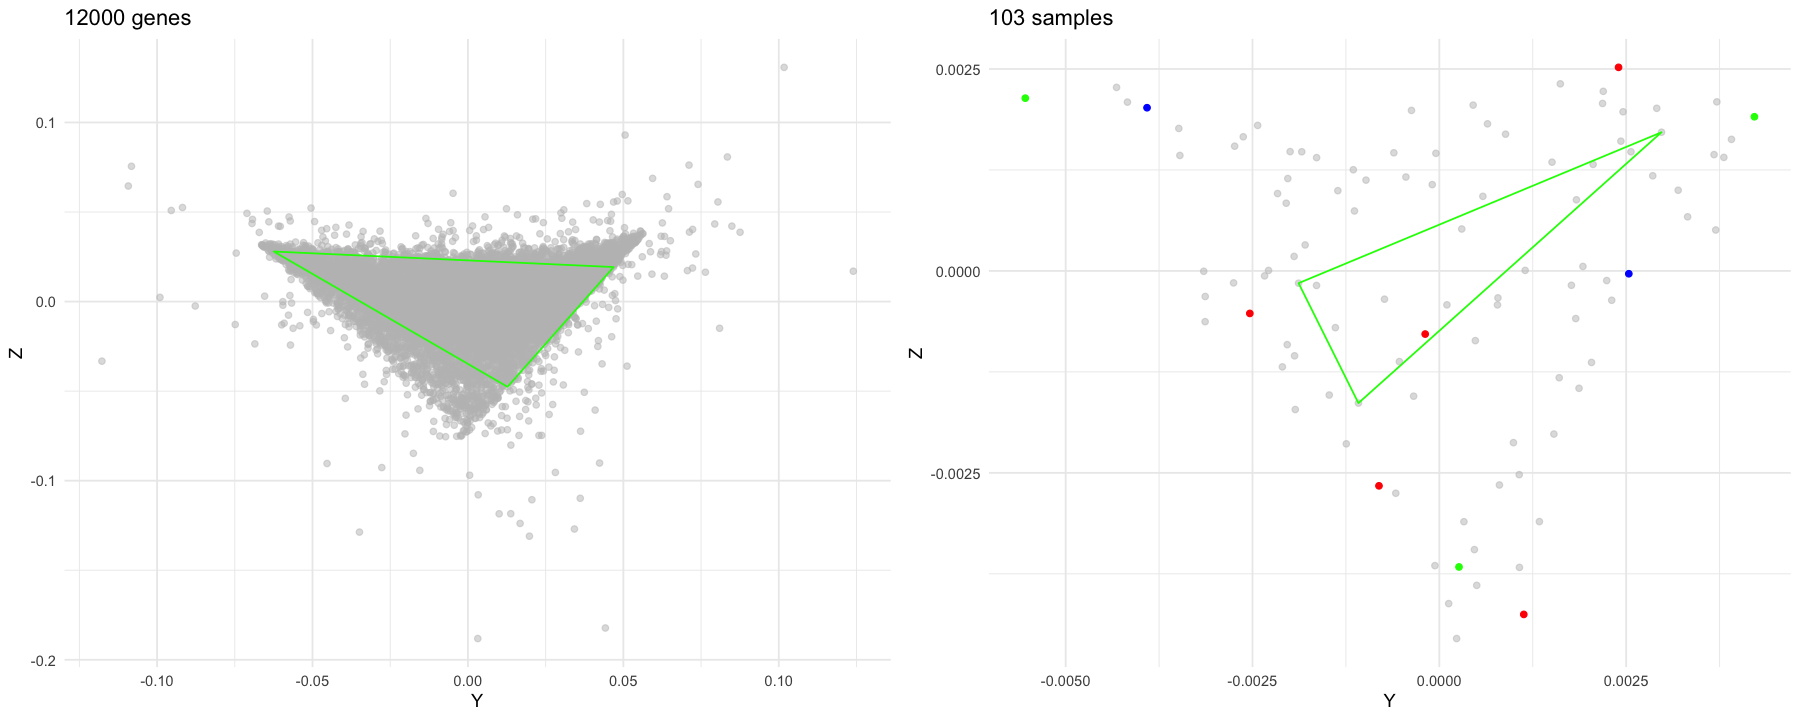

In [238]:
plotPointsColored(
    mid_alpha = 0.5,
    lo2_3,
    genes_borders = c(1, 12000),
    highlight_samples = sim_3$basis_sample_names,
    highlight_genes = sim_3$marker_gene_names
)

# Add marker genes

In [216]:
sim2 <- createSimulation(12000, 100, 3, with_marker_genes = T)
sim2 <- addBasisSamples(sim2)

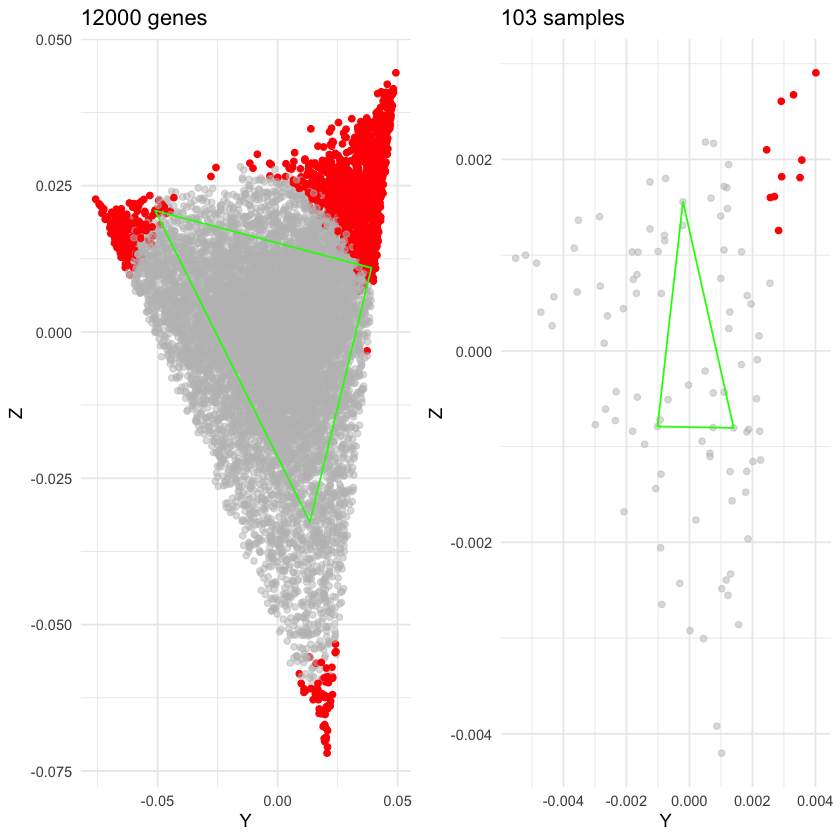

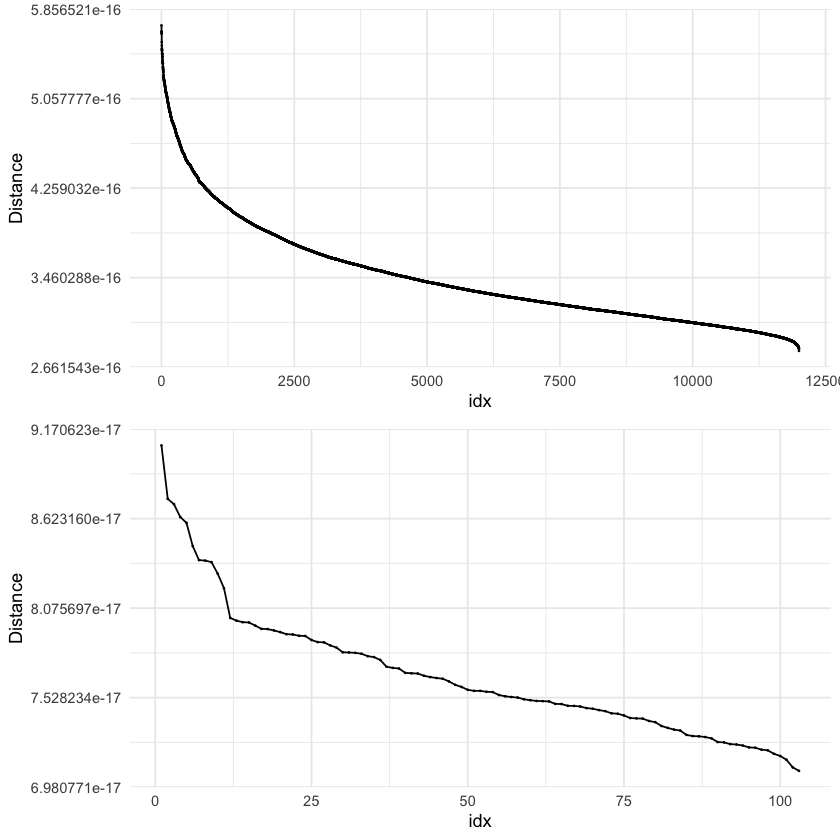

In [217]:
lo22 <- init_lo2(sim2$data, 12000)

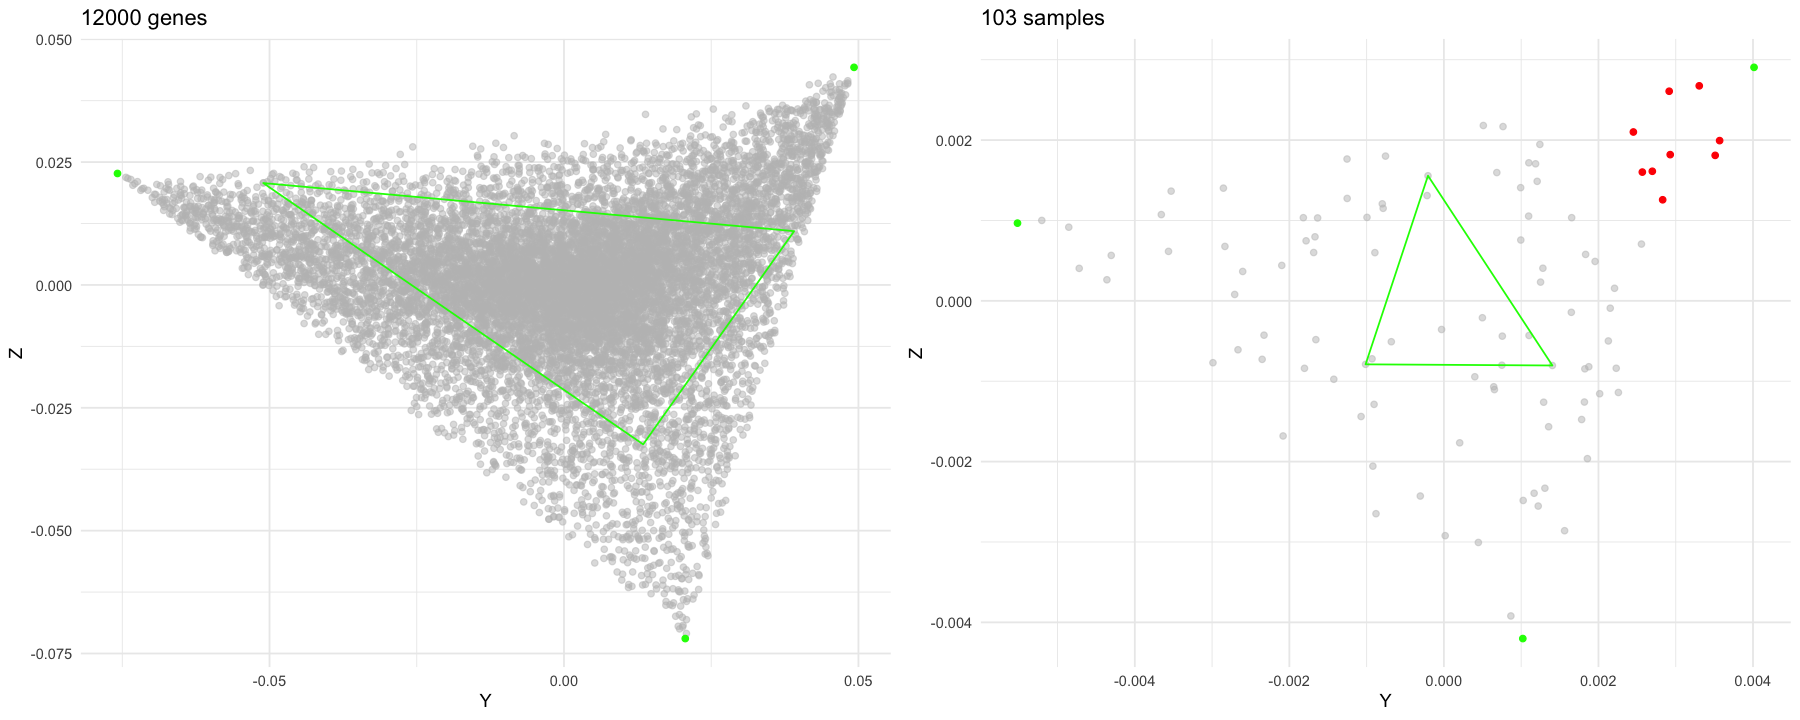

In [237]:
plotPointsColored(
    mid_alpha = 0.5,
    lo22,
    genes_borders = c(1, 12000),
    highlight_samples = sim2$basis_sample_names,
    highlight_genes = sim2$marker_gene_names
)

In [219]:
lo22$V_row[startsWith(rownames(lo22$V_row), "marker"),]

,sample_1,sample_2,sample_3,sample_4,sample_5,sample_6,sample_7,sample_8,sample_9,sample_10,⋯,sample_94,sample_95,sample_96,sample_97,sample_98,sample_99,sample_100,basis_sample_1,basis_sample_2,basis_sample_3
marker_gene_1,0.002906173,0.0008617229,0.011430495,0.004104296,0.002938863,0.022729422,0.007132338,0.0205896483,0.003012018,0.00875718,⋯,2.447758e-02,0.002262570,0.003938330,0.012168027,0.024102471,0.005549133,0.002280608,0.03020271,0.00000000,0.00000000
marker_gene_3,0.008078351,0.0279425632,0.011331594,0.008314364,0.009663863,0.001721153,0.007354848,0.0003707507,0.025516788,0.00417398,⋯,8.423614e-05,0.004255415,0.007687895,0.002085412,0.003753324,0.019303664,0.012705382,0.00000000,0.00000000,0.03032577
marker_gene_2,0.017266414,0.0013559653,0.006714823,0.015980980,0.015820802,0.005165421,0.014122203,0.0082908853,0.001594217,0.01550624,⋯,5.059690e-03,0.021258590,0.016689445,0.014312676,0.002118638,0.004868659,0.013694295,0.00000000,0.02708916,0.00000000


In [286]:
s <- createSimulation(n_genes = 3000, n_samples = 20, n_cell_types = 3, with_marker_genes = F) %>%
    addBasisSamples() %>%
    addNoise(noise_deviation = 3)

## With noise

In [225]:
sim2_3 <- addNoise(
    sim2,
    noise_deviation = 3,
    protect_samples = sim2$basis_sample_names,
    protect_genes = sim2$marker_gene_names
)

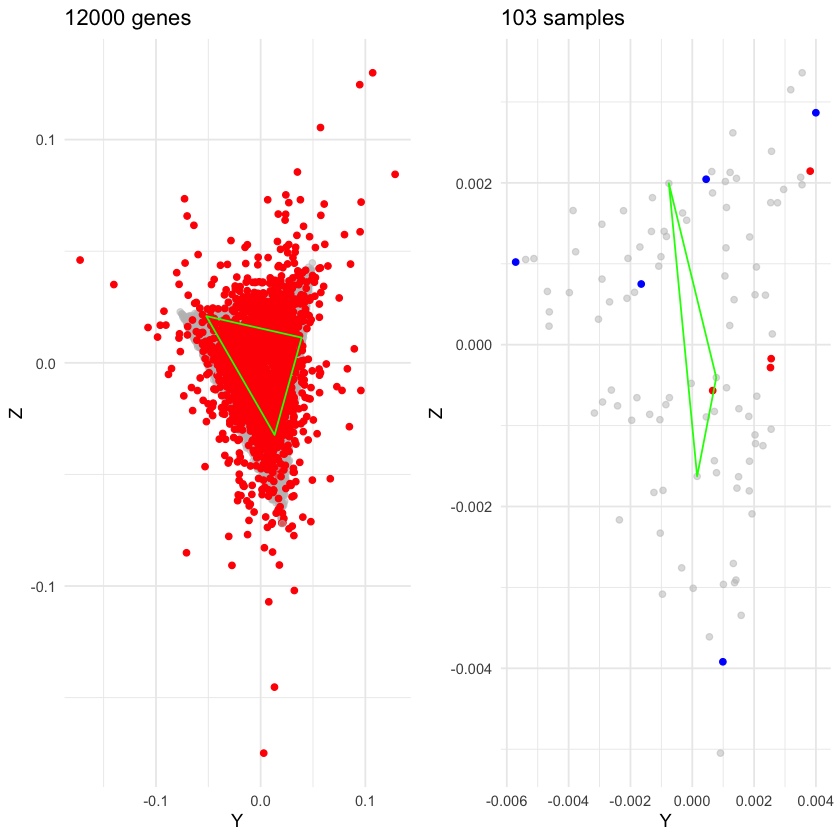

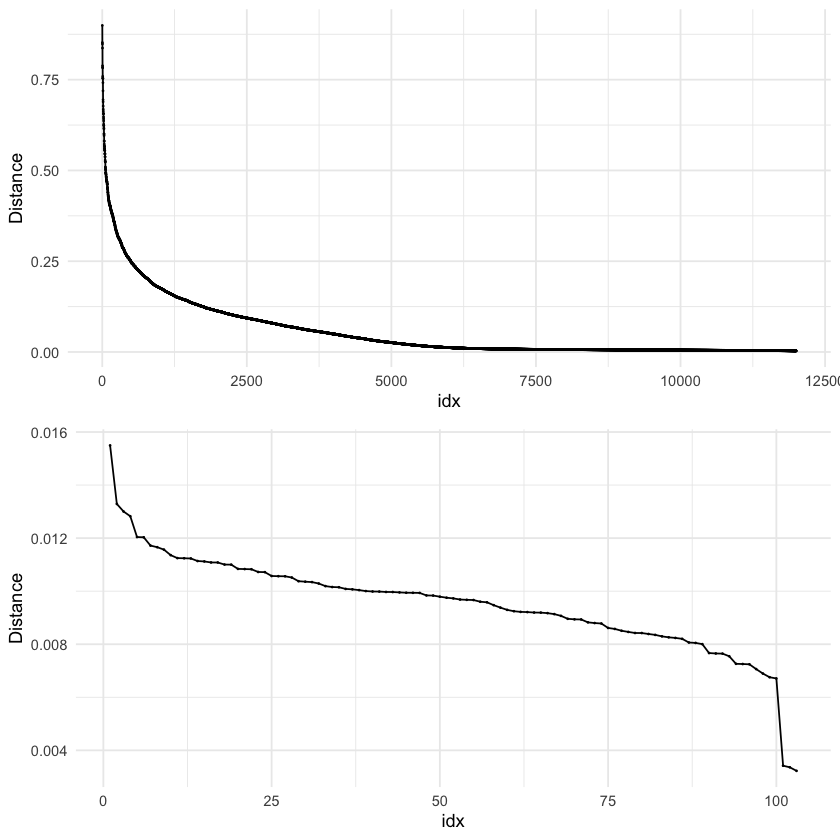

In [226]:
lo22_3 <- init_lo2(sim2_3$data, 12000)

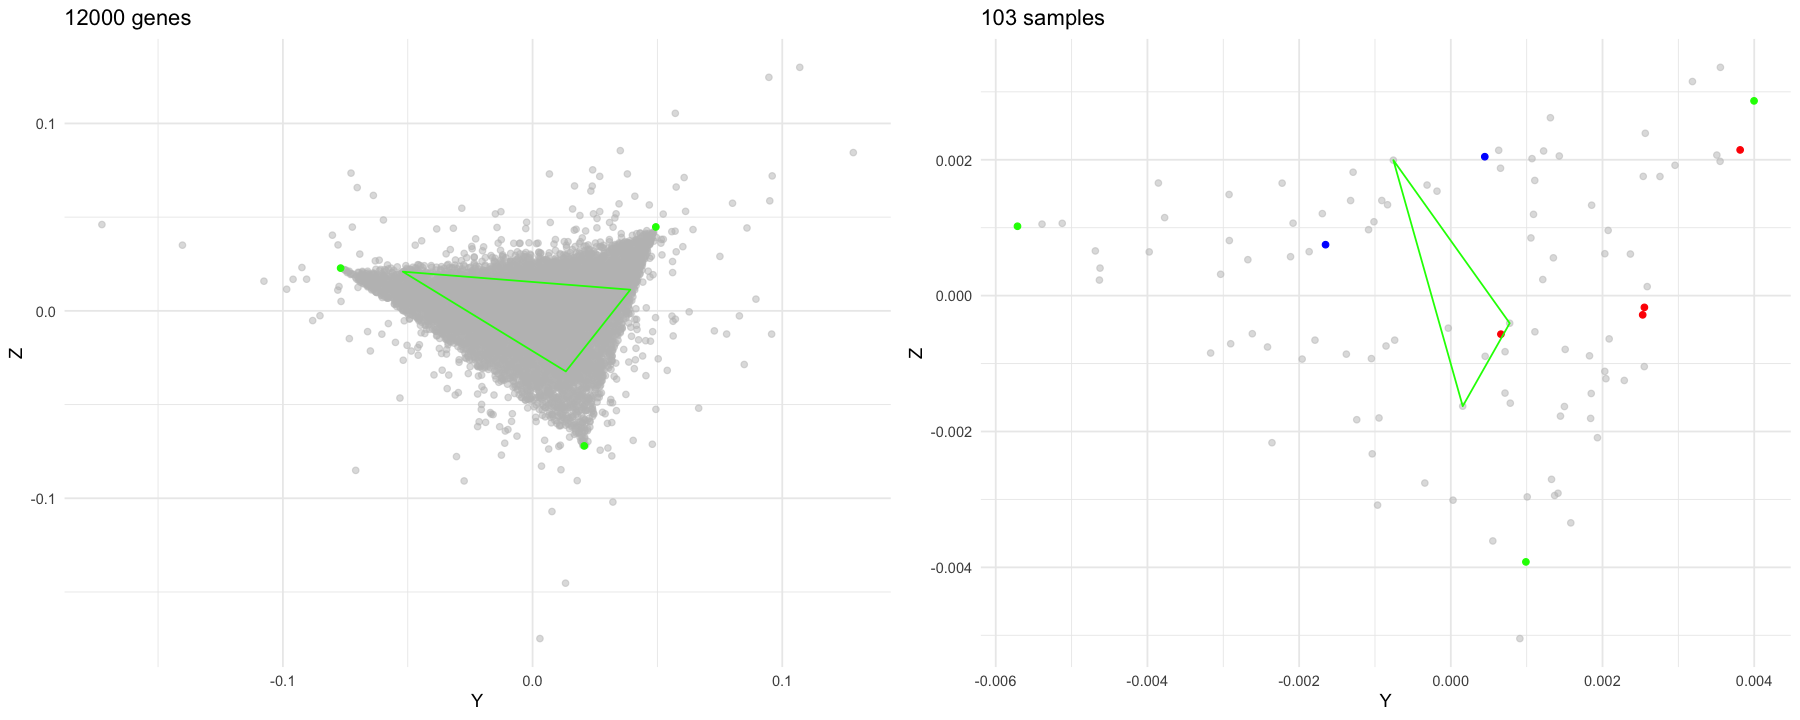

In [236]:
plotPointsColored(
    mid_alpha = 0.5,
    lo22_3,
    genes_borders = c(1, 12000),
    highlight_samples = sim2_3$basis_sample_names,
    highlight_genes = sim2_3$marker_gene_names
)

## With more noise

In [228]:
sim2_65 <- addNoise(
    sim2,
    noise_deviation = 6.5,
    protect_samples = sim2$basis_sample_names,
    protect_genes = sim2$marker_gene_names
)

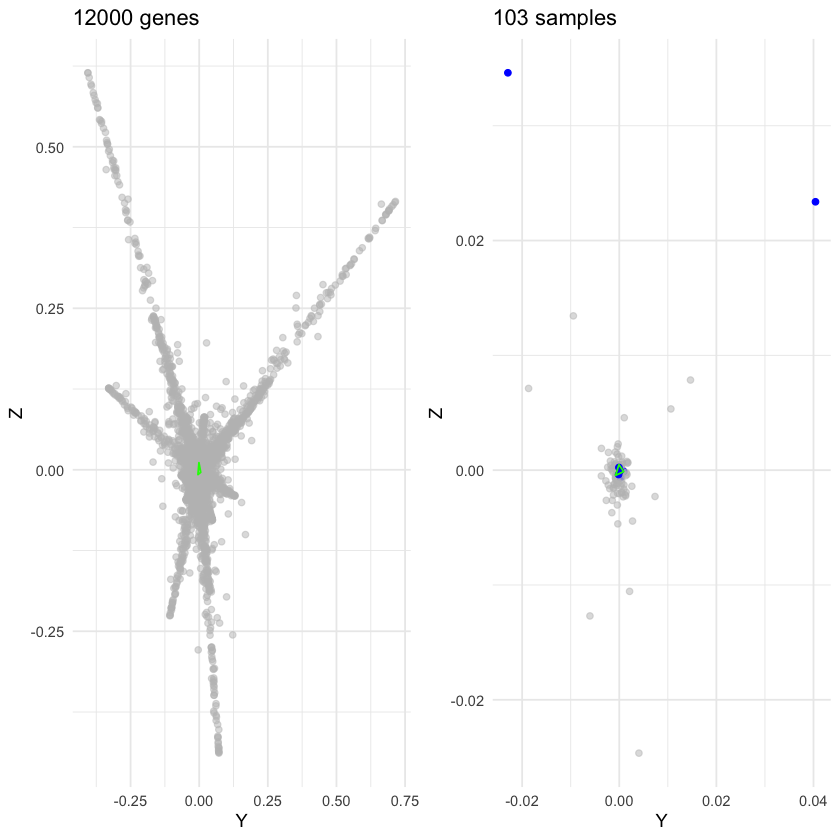

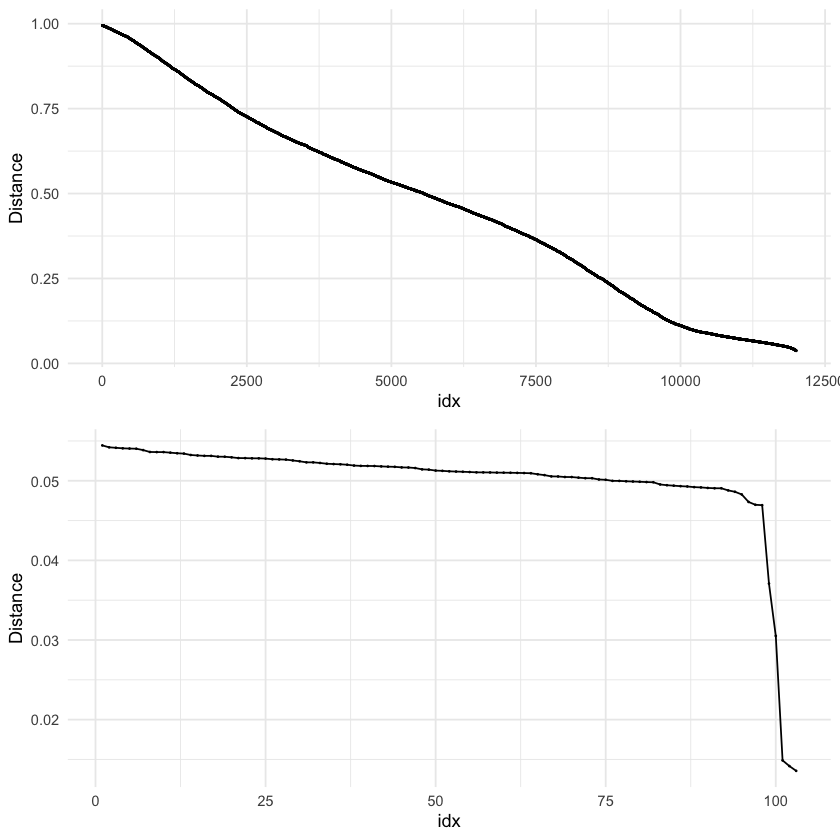

In [229]:
lo22_65 <- init_lo2(sim2_65$data, 12000)

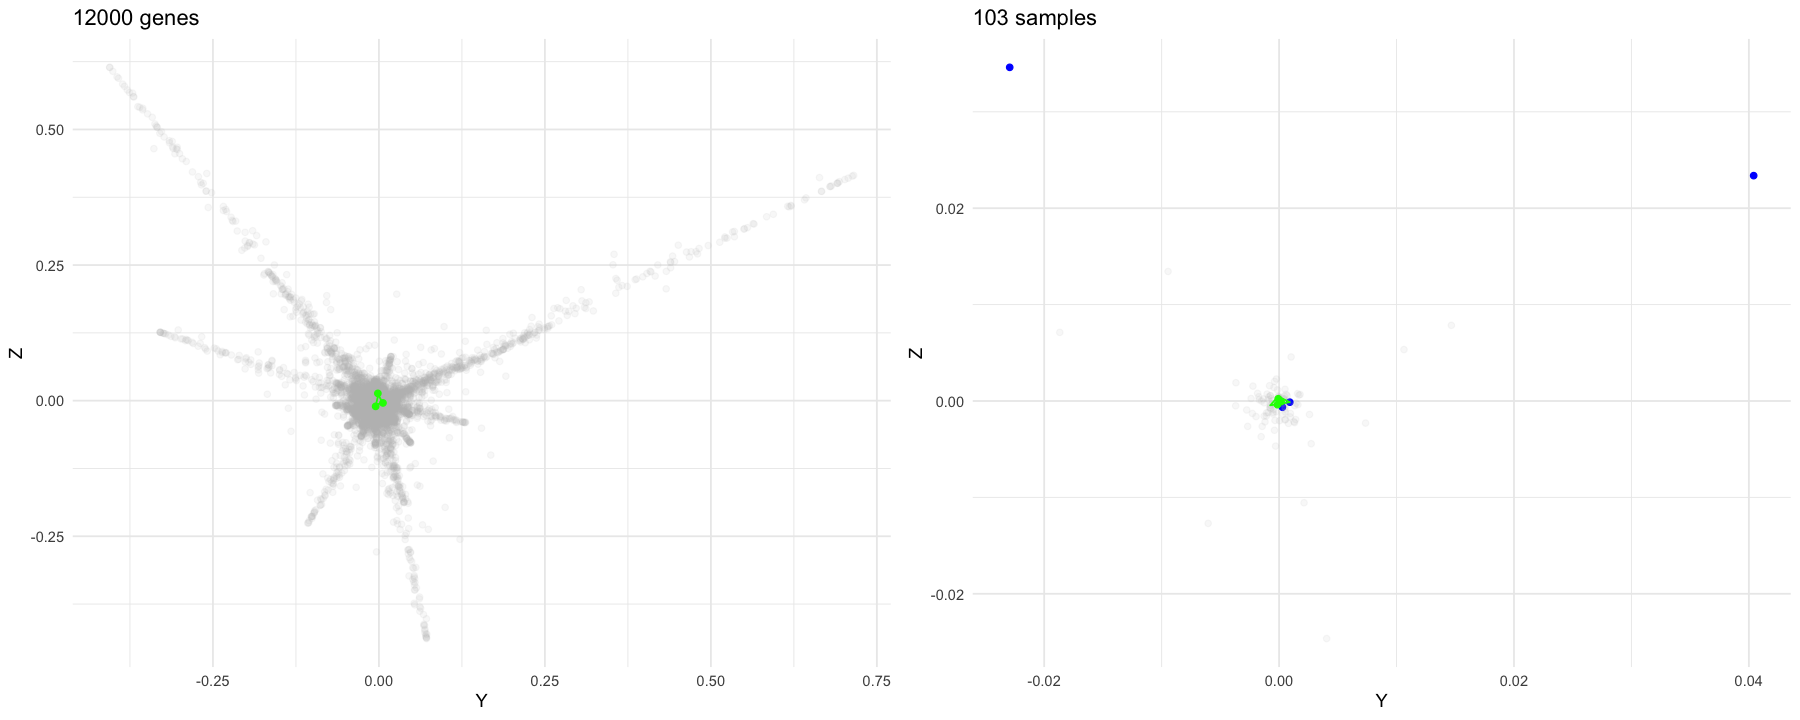

In [235]:
plotPointsColored(
    mid_alpha = 0.1,
    lo22_65,
    genes_borders = c(1, 12000),
    highlight_samples = sim2_65$basis_sample_names,
    highlight_genes = sim2_65$marker_gene_names
)

## With selective noise

In [246]:
sim2_65_sel <- addNoise(
    sim2,
    noise_deviation = 6.5,
    protect_samples = c(sim2$basis_sample_names, sample(sim2$mixed_sample_names, 50)),
    protect_genes = c(sim2$marker_gene_names, sample(rownames(sim2$data), 6000))
)

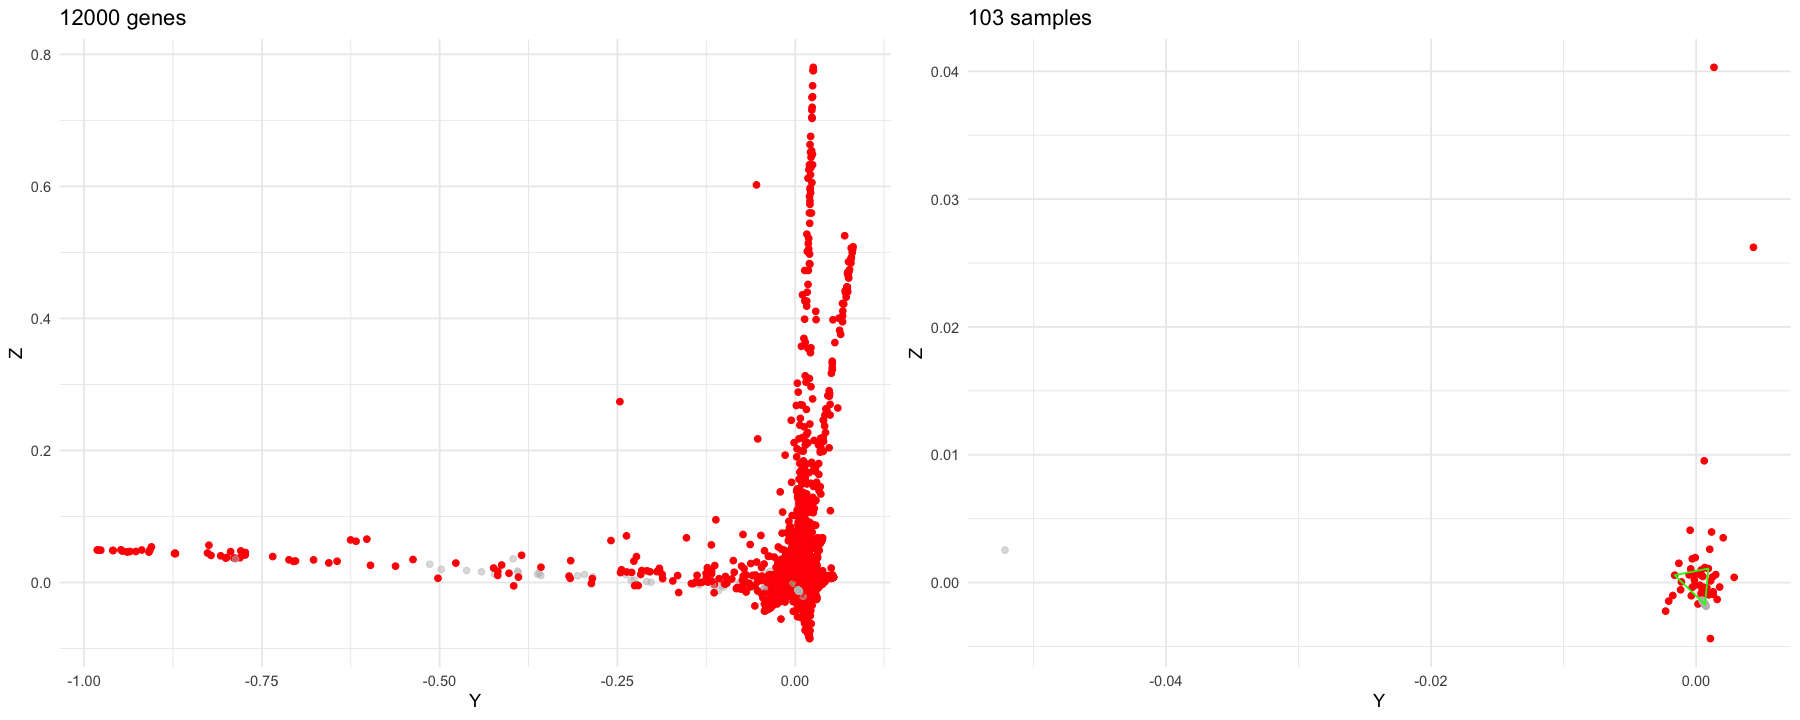

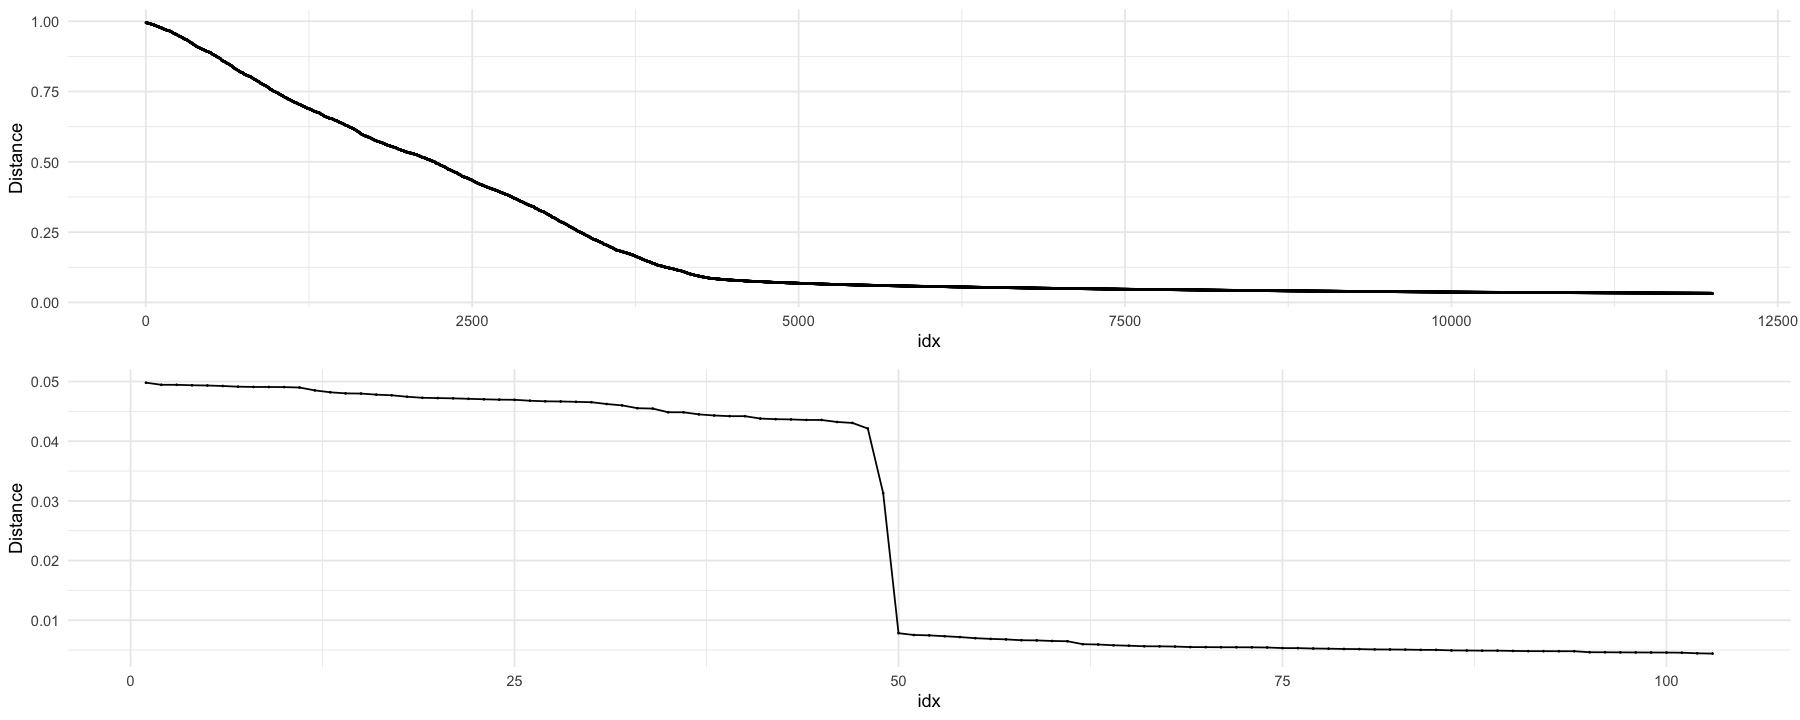

In [247]:
lo22_65_sel <- init_lo2(sim2_65_sel$data, 12000)

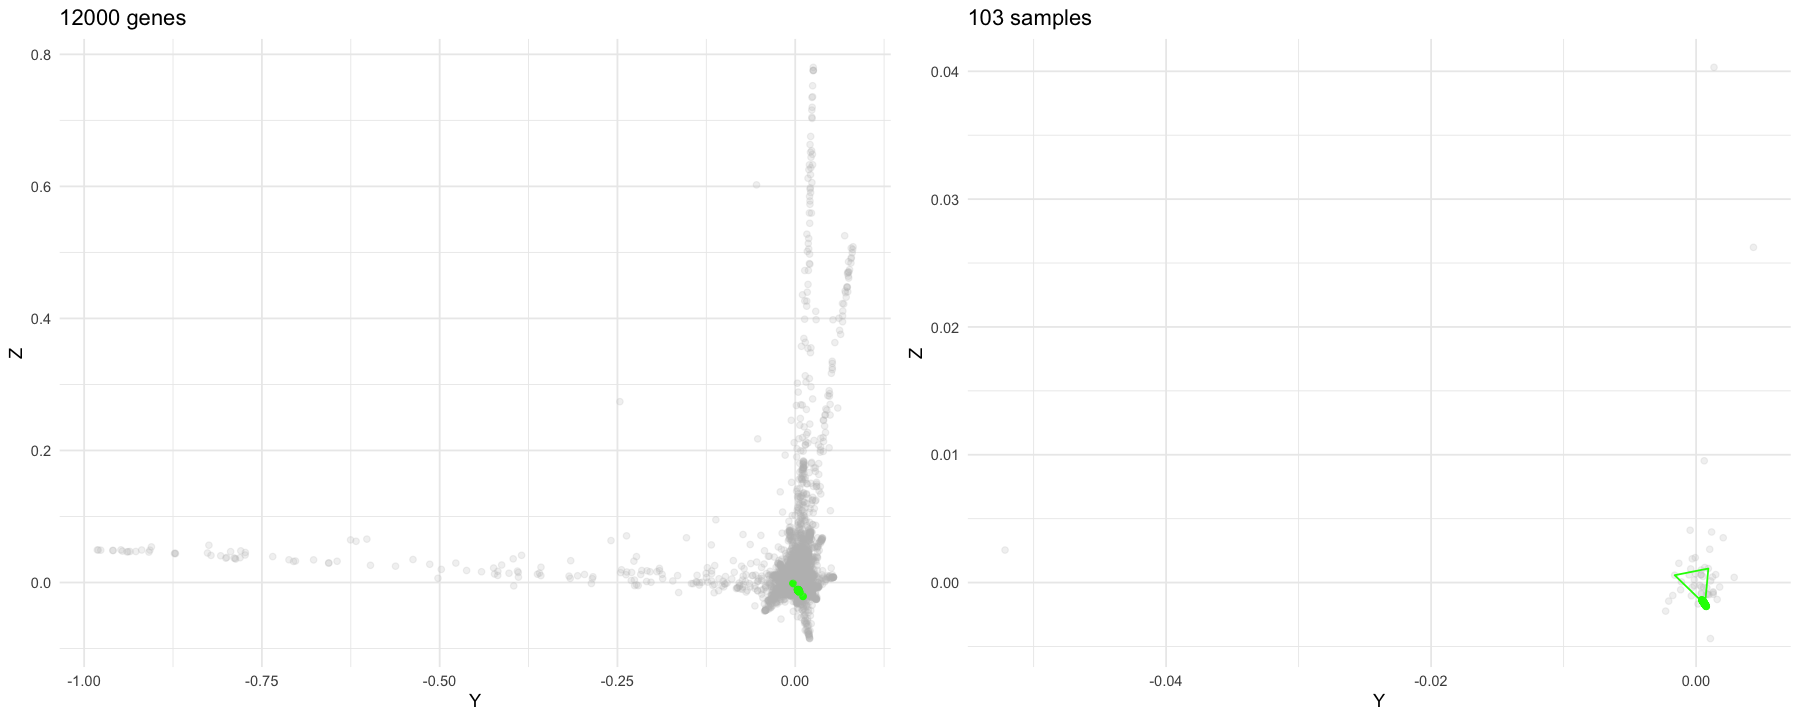

In [258]:
plotPointsColored(
    mid_alpha = 0.2,
    lo22_65_sel,
    genes_borders = c(1, 12000),
    samples_borders = c(1, 103),
    highlight_samples = sim2_65_sel$protected_samples,
    highlight_genes = sim2_65_sel$protected_genes
)

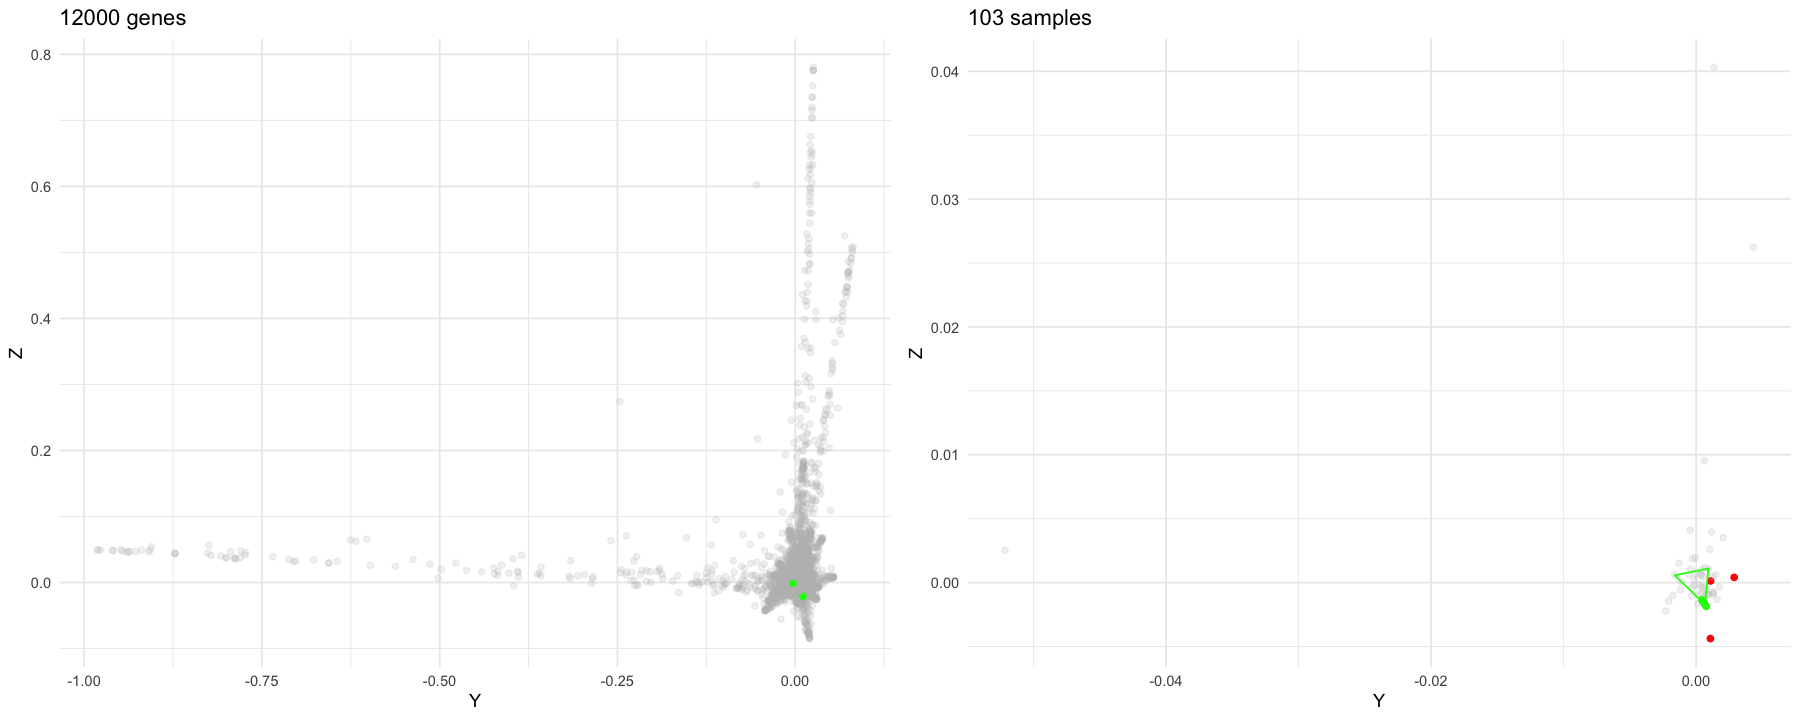

In [259]:
plotPointsColored(
    mid_alpha = 0.2,
    lo22_65_sel,
    genes_borders = c(1, 12000),
    samples_borders = c(1, 100),
    highlight_samples = sim2_65_sel$basis_sample_names,
    highlight_genes = sim2_65_sel$marker_gene_names
)

# New distances

In [275]:
calculateNewDistances <- function(self) {
  if (is.null(self$R)) {
    stop("Run getSvdProjectionsNew first")
  }

  distance_genes <- sqrt(apply((t(self$V_row) - t(self$R) %*% self$R %*% t(self$V_row) %*% t(self$S) %*% self$S)^2, 2, sum))
  distance_samples <- sqrt(apply((self$V_column - t(self$S) %*% self$S %*% self$V_column %*% t(self$R) %*% self$R)^2, 2, sum))

  list(
      distance_genes = sort(distance_genes, decreasing = T),
      distance_samples = sort(distance_samples, decreasing = T)
  )
}

plotNewDistances <- function(distances) {

      toPlot_Genes <- data.frame(Distance = distances[["distance_genes"]])
      rownames(toPlot_Genes) <- names(distances[["distance_genes"]])
      toPlot_Genes$idx <- 1:nrow(toPlot_Genes)

      toPlot_Samples <- data.frame(Distance = distances[["distance_samples"]])
      rownames(toPlot_Samples) <- names(distances[["distance_samples"]])
      toPlot_Samples$idx <- 1:nrow(toPlot_Samples)

      pltGenes <- ggplot(toPlot_Genes, aes(x = idx, y = Distance)) +
        geom_point(size = 0.1) +
        geom_line() +
        theme_minimal()

      pltSamples <- ggplot(toPlot_Samples, aes(x = idx, y = Distance)) +
        geom_point(size = 0.1) +
        geom_line() +
        theme_minimal()

      grid.arrange(pltGenes, pltSamples)   
}

In [281]:
diff <- t(lo22_65_sel$S) %*% lo22_65_sel$S %*% lo22_65_sel$V_column %*% t(lo22_65_sel$R) %*% lo22_65_sel$R -
t(lo22_65_sel$S) %*% lo22_65_sel$S %*% lo22_65_sel$V_column

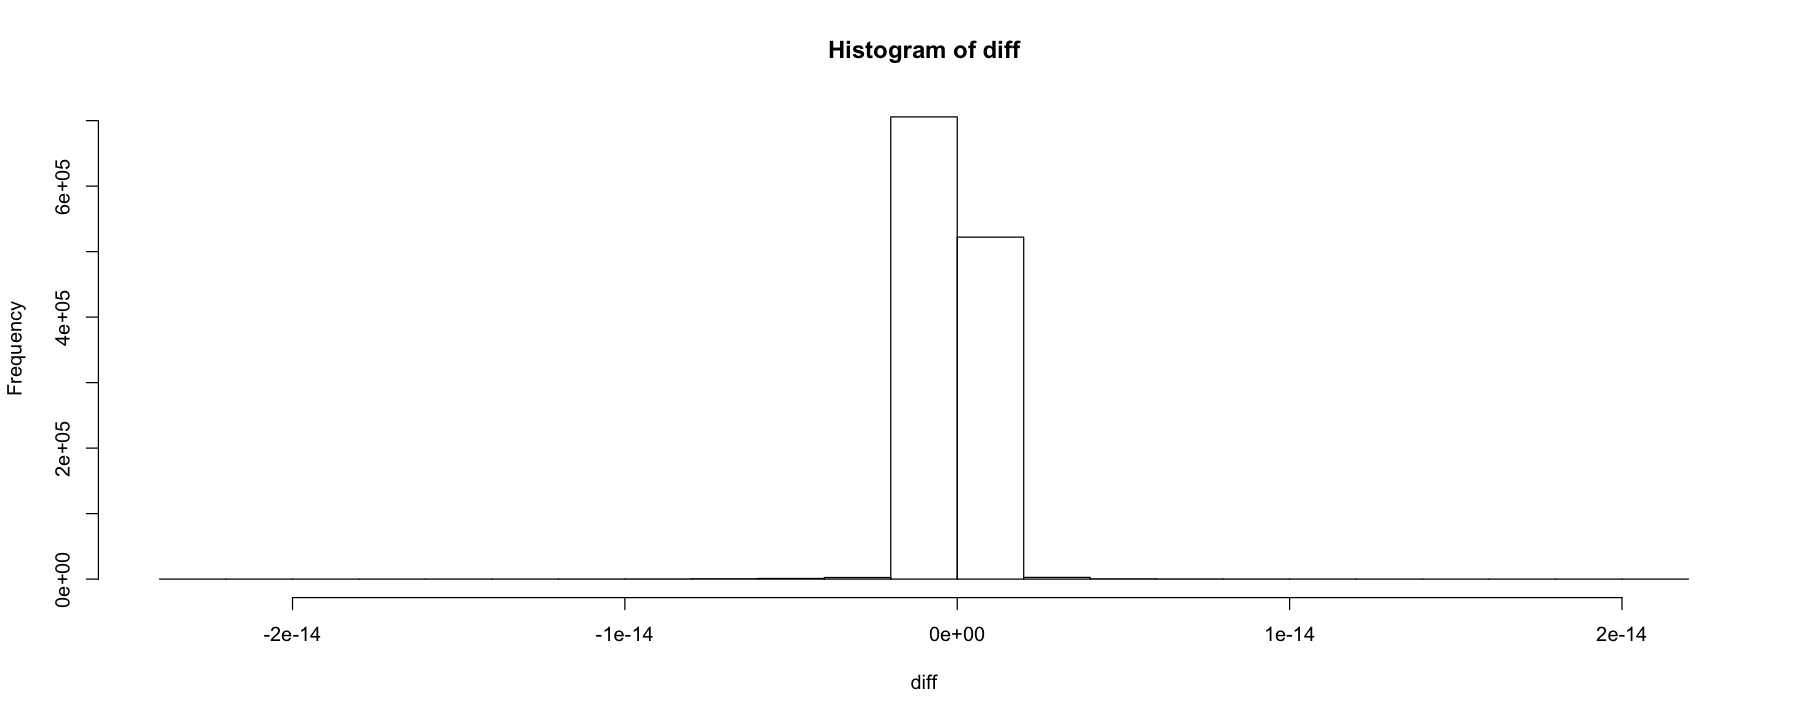

In [282]:
hist(diff)

In [276]:
dist <- calculateNewDistances(lo22_65_sel)

In [277]:
lo <- lo22_65_sel$clone(deep=T)
lo$distance_genes <- dist[["distance_genes"]]
lo$distance_samples <- dist[["distance_samples"]]

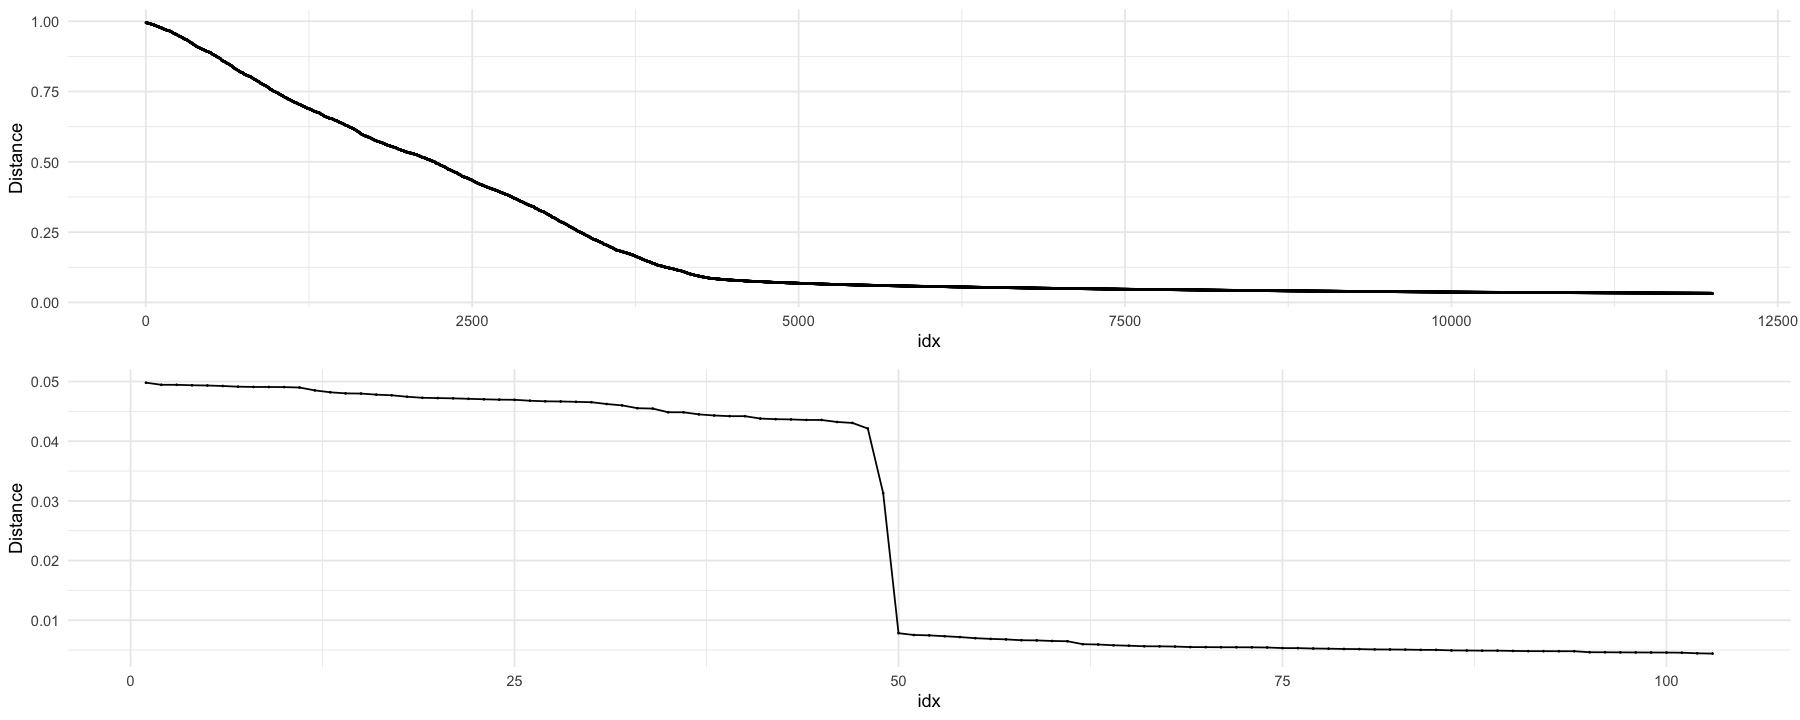

In [278]:
lo$plotDistances()

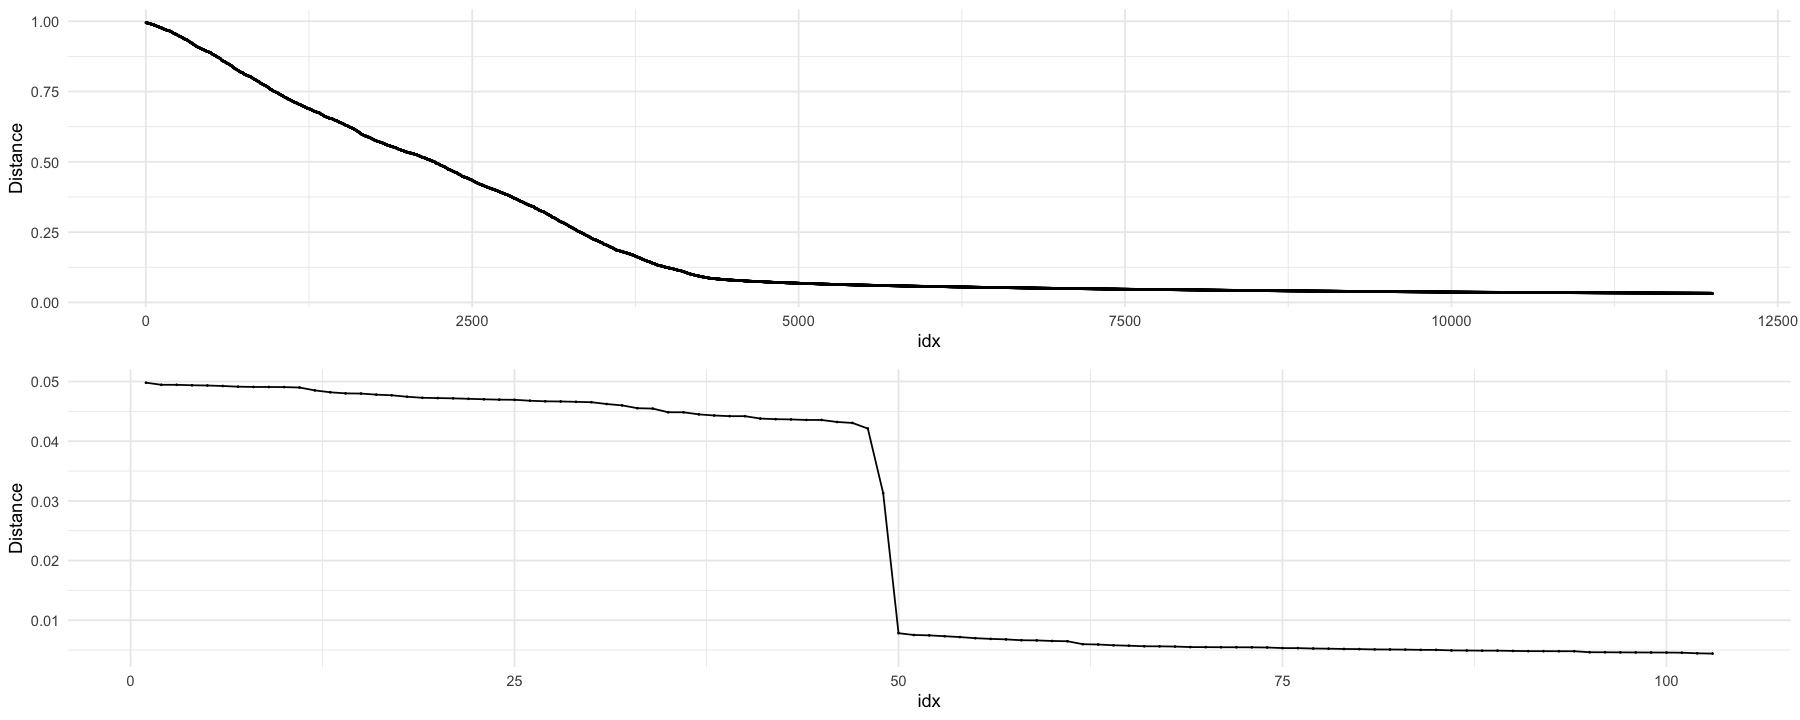

In [273]:
lo22_65_sel$plotDistances()

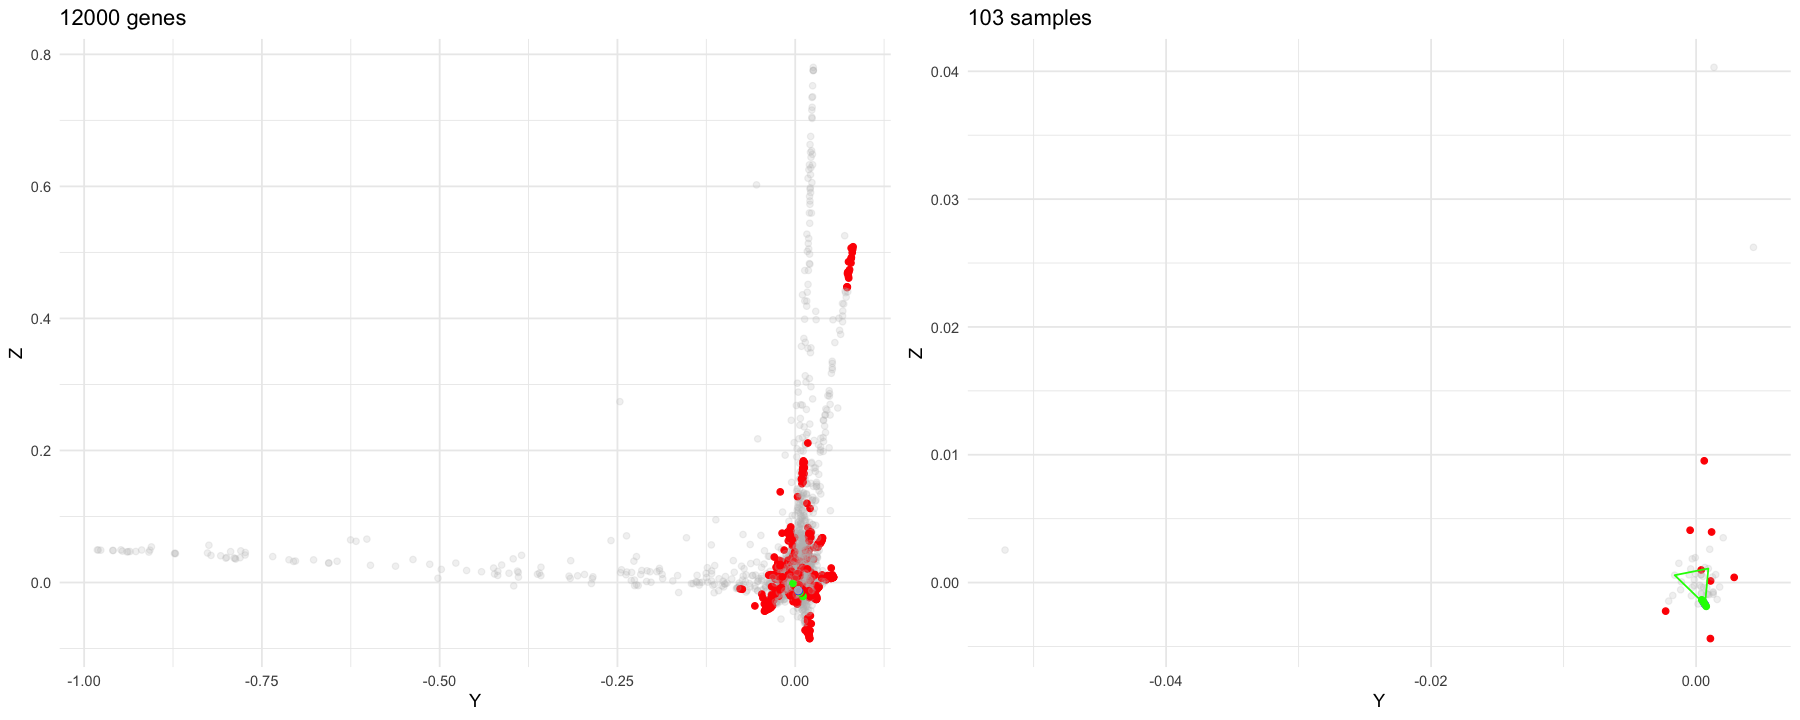

In [272]:
plotPointsColored(
    mid_alpha = 0.2,
    lo22_65_sel,
    genes_borders = c(200, 11000),
    samples_borders = c(6, 95),
    highlight_samples = sim2_65_sel$basis_sample_names,
    highlight_genes = sim2_65_sel$marker_gene_names
)

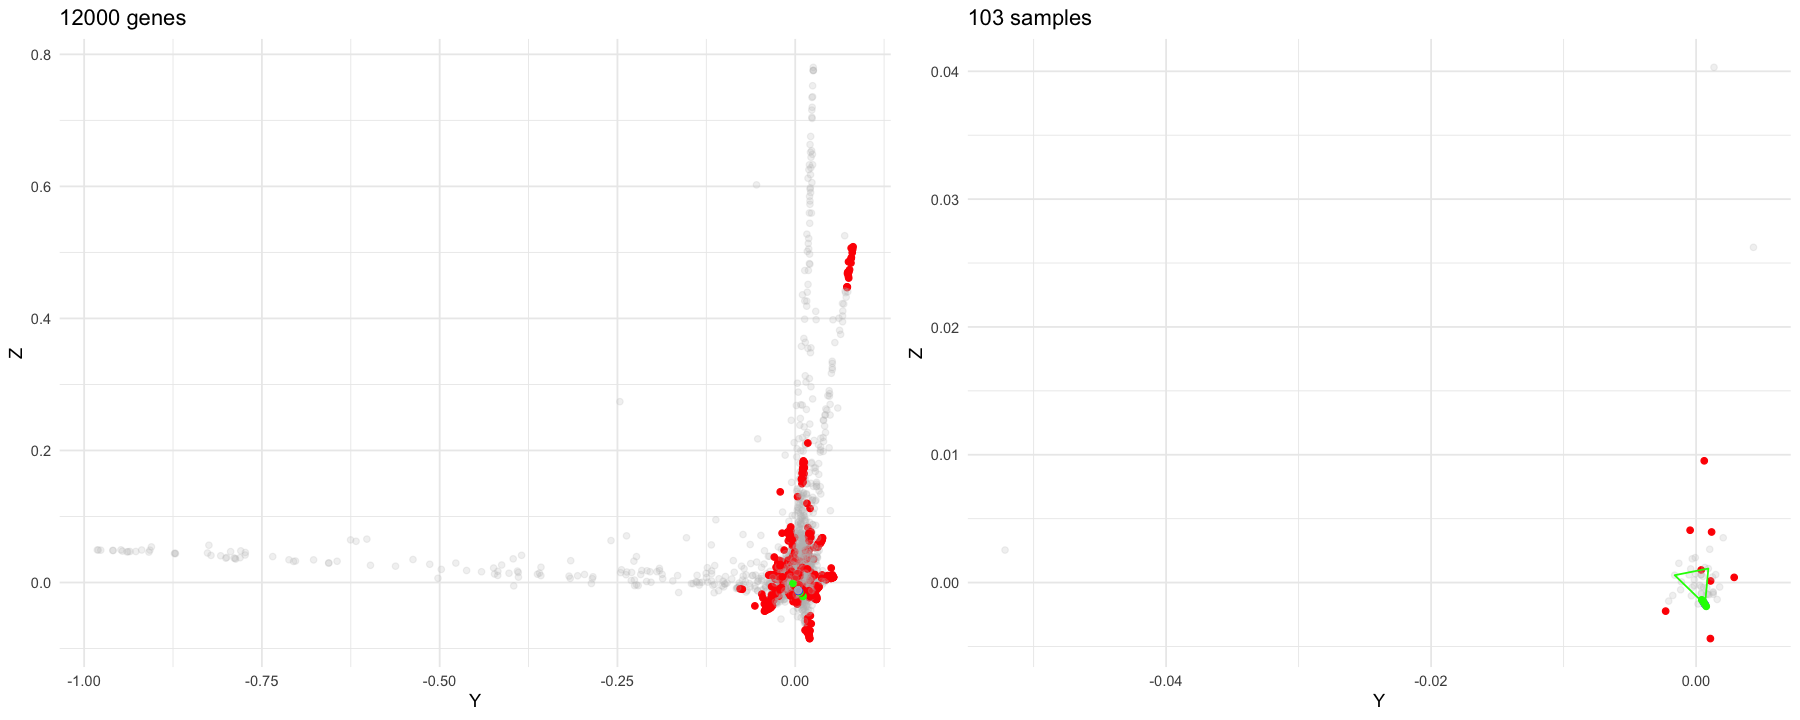

In [271]:
plotPointsColored(
    mid_alpha = 0.2,
    lo,
    genes_borders = c(200, 11000),
    samples_borders = c(6, 95),
    highlight_samples = sim2_65_sel$basis_sample_names,
    highlight_genes = sim2_65_sel$marker_gene_names
)